In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
iris = load_iris()
X = iris.data
y = iris.target  # 0,1,2
y_bin = label_binarize(y, classes=[0,1,2])

In [15]:
X_train, X_test, y_train_idx, y_test_idx = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# one-hot for training

In [16]:
# OneHotEncoder Fix for all sklearn versions
from sklearn.preprocessing import OneHotEncoder

try:
    enc = OneHotEncoder(sparse_output=False)
except:
    enc = OneHotEncoder(sparse=False)

print(" Encoder Ready")


 Encoder Ready


In [17]:
y_train = enc.fit_transform(y_train_idx.reshape(-1,1))
y_test = enc.transform(y_test_idx.reshape(-1,1))


In [18]:
model = MLPClassifier(hidden_layer_sizes=(5,5,5,5,5),
                      max_iter=300,
                      learning_rate_init=0.01,
                      activation='relu',
                      solver='adam',
                      random_state=42)

history = model.fit(X_train, y_train_idx)

print(" Model Trained Successfully")

 Model Trained Successfully



 Accuracy: 1.0

 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



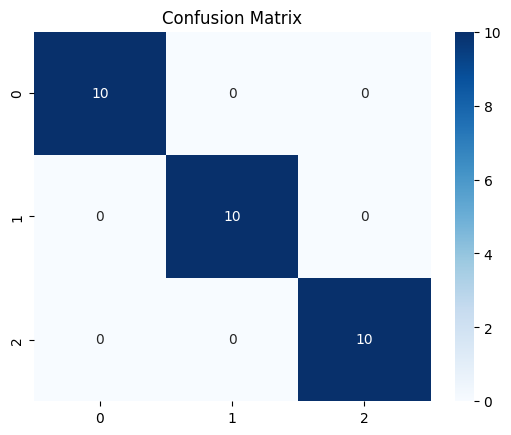

In [19]:
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test_idx, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test_idx, y_pred))

cm = confusion_matrix(y_test_idx, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()

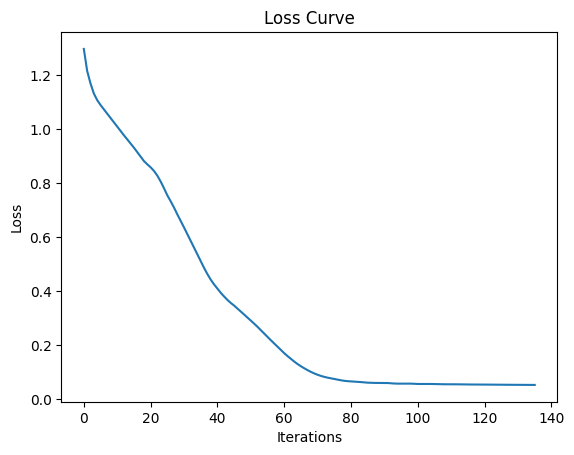

In [20]:
plt.plot(model.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()